In [1]:
from pathlib import Path
import pandas as pd

## Near_field

In [2]:
current_dir = Path.cwd()
parent_dir = current_dir.parent
input_dir1 = Path ("G:/Chamodi/LSDYNA_1D/Incident_pressure_time_history/Near_field_time_history_dataset")
#input_dir1 = Path ("C:/Users/z5379606/OneDrive - UNSW/Documents/LSDYNA_files/Incident_pressure/Incident_pressure_time_history/Near_field_time_history_dataset")

#Access folders inside input folder
input_dir2 =  [folder1 for folder1 in input_dir1.iterdir() if folder1.is_dir()]
#print ("INPUT 2",input_dir2)

In [3]:
# Dictionary to store max pressure for each file across all folders
max_pressure_per_SD = {}
min_pressure_per_SD = {}
datapoints_per_SD = {}

# Iterate through each folder in input_dir2
for folder in input_dir2:
    print(f"Processing folder: {folder}")
    
    # Iterate through files in the folder (assuming files are named as file1, file2, etc.)
    for i in range(1, 18,2):  # Assuming file names are like file1, file2, ... file99
        file_name = f"{i}.xlsx"
        file_path = folder / file_name
        
        if file_path.exists():
            # Read the file (assuming it is in a format that can be read by pandas, e.g., CSV, Excel)
            try:
                df = pd.read_excel(file_path)  # Modify this if files are not CSV (e.g., use pd.read_excel for Excel files)
                
                # Assuming the pressure data is in a column named 'Pressure'
                max_pressure = df["Pressure"].max()+101.25
                min_pressure = df["Pressure"].min()+101.25
                datapoints = len(df["Pressure"])
                
                # Update max pressure for this file across all folders
                if i not in max_pressure_per_SD:
                    max_pressure_per_SD[i] = max_pressure
                else:
                    max_pressure_per_SD[i] = max(max_pressure_per_SD[i], max_pressure)
                    
                # Update max pressure for this file across all folders
                if i not in min_pressure_per_SD:
                    min_pressure_per_SD[i] = min_pressure
                else:
                    min_pressure_per_SD[i] = min(min_pressure_per_SD[i], min_pressure)
                    
                # Update max pressure for this file across all folders
                if i not in datapoints_per_SD:
                    datapoints_per_SD[i] = datapoints
                else:
                    datapoints_per_SD[i] = datapoints_per_SD[i] + datapoints
                
                print(f"Max pressure for {i} in {folder}: {max_pressure}, {min_pressure}, {datapoints}")
            except Exception as e:
                print(f"Error processing {file_path}: {e}")
        else:
            # If the file does not exist, stop looking for further files (assumes sequential naming)
            break

Processing folder: G:\Chamodi\LSDYNA_1D\Incident_pressure_time_history\Near_field_time_history_dataset\L13_1
Max pressure for 1 in G:\Chamodi\LSDYNA_1D\Incident_pressure_time_history\Near_field_time_history_dataset\L13_1: 591.9359999999999, 67.241, 155
Max pressure for 3 in G:\Chamodi\LSDYNA_1D\Incident_pressure_time_history\Near_field_time_history_dataset\L13_1: 377.326, 71.955703125, 155
Max pressure for 5 in G:\Chamodi\LSDYNA_1D\Incident_pressure_time_history\Near_field_time_history_dataset\L13_1: 280.237, 76.45339843800001, 155
Max pressure for 7 in G:\Chamodi\LSDYNA_1D\Incident_pressure_time_history\Near_field_time_history_dataset\L13_1: 229.687, 80.018101562, 155
Max pressure for 9 in G:\Chamodi\LSDYNA_1D\Incident_pressure_time_history\Near_field_time_history_dataset\L13_1: 200.012, 82.77160156199999, 155
Max pressure for 11 in G:\Chamodi\LSDYNA_1D\Incident_pressure_time_history\Near_field_time_history_dataset\L13_1: 178.464, 84.919898438, 155
Max pressure for 13 in G:\Chamodi\LS

In [4]:
# Given SD mapping
SD_mapping = {
    1: 1, 3: 1.25, 5: 1.5, 7: 1.75, 9: 2, 11: 2.25, 13: 2.5, 15: 2.75, 17: 3}

# Extract standoff distances from the file names based on SD_mapping
standoff_distances = [SD_mapping[file] for file in max_pressure_per_SD.keys()]

# Create a DataFrame using the dictionaries
results_df = pd.DataFrame({
    'standoff distance': standoff_distances,
    'max_pressure': [max_pressure_per_SD[file] for file in max_pressure_per_SD.keys()],
    'min_pressure': [min_pressure_per_SD[file] for file in min_pressure_per_SD.keys()],
    'datapoints': [datapoints_per_SD[file] for file in datapoints_per_SD.keys()]
})

# Display the DataFrame
print(results_df)

   standoff distance  max_pressure  min_pressure  datapoints
0               1.00       8261.30      0.218434        5125
1               1.25       5692.33      0.274766        5116
2               1.50       4308.44      0.368294        5414
3               1.75       3309.47      0.554935        5400
4               2.00       2630.25      1.149720        5389
5               2.25       2188.57     59.522605        5381
6               2.50       1763.24     64.689199        5020
7               2.75       1459.21     64.634895        4773
8               3.00       1218.17     64.705895        4723


In [6]:
plt.rcdefaults()

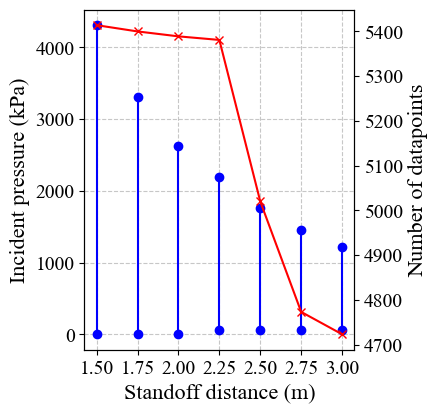

In [10]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Filter the DataFrame to include only rows with Standoff distance >= 3
filtered_df = results_df[results_df['standoff distance'] >= 1.5]

# Set global font to Times New Roman
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['font.size'] = 16

fig, ax1 = plt.subplots(figsize=(4, 5))

# Plot max and min pressure values with standoff distance
for _, row in filtered_df.iterrows():
    ax1.plot([row['standoff distance'], row['standoff distance']],
             [row['min_pressure'], row['max_pressure']],
             color='blue', marker='o', label='Pressure Range' if _ == results_df .index[0] else "")

# Label the primary y-axis (for pressure values)
ax1.set_xlabel('Standoff distance (m)')
ax1.set_ylabel('Incident pressure (kPa)')
ax1.tick_params(axis='both', labelsize=14)
ax1.set_xticks([1.5, 1.75, 2, 2.25, 2.5, 2.75, 3])
#ax1.set_xlim(2.8,31)

# Create a secondary y-axis for the number of data points
ax2 = ax1.twinx()
ax2.plot(filtered_df['standoff distance'], filtered_df['datapoints'],
         color='red', marker='x', label='Number of datapoints')
ax2.set_ylabel('Number of datapoints')
ax2.tick_params(axis='y', labelsize=14)
ax2.set_xticks([1.5, 1.75, 2, 2.25, 2.5, 2.75, 3])
#ax1.set_xlim(2.8,31)

# Add grid lines
ax1.grid(True, linestyle='--', alpha=0.7)

# Combine legend handles and labels from both axes
handles, labels = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
handles += handles2
labels += labels2

# Add legend outside the plot with two columns
#fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, 0), ncol=2, fontsize=16, frameon=False)

# Title and layout adjustments
# plt.title('Pressure Range and Number of Datapoints vs. Standoff Distance')
fig.subplots_adjust(bottom=0.2, right = 0.8)

# Save the plot as an image
plt.savefig('IP_nearfield_info_plot3.png', dpi=200, facecolor='white', bbox_inches='tight')

## Far_field

In [6]:
input_dir1b = Path ("G:/Chamodi/LSDYNA_1D/Incident_pressure_time_history/Far_field_time_history_dataset")
#input_dir1b = Path ("C:/Users/z5379606/OneDrive - UNSW/Documents/LSDYNA_files/Incident_pressure/Incident_pressure_time_history/Far_field_time_history_dataset")

#Access folders inside input folder
input_dir2b =  [folder1b for folder1b in input_dir1b.iterdir() if folder1b.is_dir()]
#print ("INPUT 2",input_dir2)

In [7]:
# Dictionary to store max pressure for each file across all folders
max_pressure_per_SD_b = {}
min_pressure_per_SD_b = {}
datapoints_per_SD_b = {}

# Iterate through each folder in input_dir2
for folder in input_dir2b:
    print(f"Processing folder: {folder}")
    
    values = list(range(1, 60, 4))
    values.append(59)
    
    # Iterate through files in the folder (assuming files are named as file1, file2, etc.)
    for i in values:  # Assuming file names are like file1, file2, ... file99
        file_name = f"P{i}.xlsx"
        file_path = folder / file_name
        
        if file_path.exists():
            # Read the file (assuming it is in a format that can be read by pandas, e.g., CSV, Excel)
            try:
                df = pd.read_excel(file_path)  # Modify this if files are not CSV (e.g., use pd.read_excel for Excel files)
                
                # Assuming the pressure data is in a column named 'Pressure'
                max_pressure = df["Pressure"].max()+101.25
                min_pressure = df["Pressure"].min()+101.25
                datapoints = len(df["Pressure"])
                
                # Update max pressure for this file across all folders
                if i not in max_pressure_per_SD_b:
                    max_pressure_per_SD_b[i] = max_pressure
                else:
                    max_pressure_per_SD_b[i] = max(max_pressure_per_SD_b[i], max_pressure)
                    
                # Update max pressure for this file across all folders
                if i not in min_pressure_per_SD_b:
                    min_pressure_per_SD_b[i] = min_pressure
                else:
                    min_pressure_per_SD_b[i] = min(min_pressure_per_SD_b[i], min_pressure)
                    
                # Update max pressure for this file across all folders
                if i not in datapoints_per_SD_b:
                    datapoints_per_SD_b[i] = datapoints
                else:
                    datapoints_per_SD_b[i] = datapoints_per_SD_b[i] + datapoints
                
                print(f"Max pressure for {i} in {folder}: {max_pressure}, {min_pressure}, {datapoints}")
            except Exception as e:
                print(f"Error processing {file_path}: {e}")
        else:
            # If the file does not exist, stop looking for further files (assumes sequential naming)
            break

Processing folder: G:\Chamodi\LSDYNA_1D\Incident_pressure_time_history\Far_field_time_history_dataset\L13_1
Max pressure for 1 in G:\Chamodi\LSDYNA_1D\Incident_pressure_time_history\Far_field_time_history_dataset\L13_1: 592.077625, 67.441578125, 155
Max pressure for 5 in G:\Chamodi\LSDYNA_1D\Incident_pressure_time_history\Far_field_time_history_dataset\L13_1: 147.6833125, 89.382851562, 155
Max pressure for 9 in G:\Chamodi\LSDYNA_1D\Incident_pressure_time_history\Far_field_time_history_dataset\L13_1: 121.2835625, 94.456695312, 155
Max pressure for 13 in G:\Chamodi\LSDYNA_1D\Incident_pressure_time_history\Far_field_time_history_dataset\L13_1: 113.91839844, 96.580039062, 155
Max pressure for 17 in G:\Chamodi\LSDYNA_1D\Incident_pressure_time_history\Far_field_time_history_dataset\L13_1: 110.32221094, 97.7326875, 155
Max pressure for 21 in G:\Chamodi\LSDYNA_1D\Incident_pressure_time_history\Far_field_time_history_dataset\L13_1: 108.03785156, 95.794601562, 155
Max pressure for 25 in G:\Chamo

In [10]:
print (max_pressure_per_SD_b)

{1: 8288.404, 5: 1218.433375, 9: 409.27071875, 13: 241.05642188000002, 17: 184.40904688, 21: 157.91648438, 25: 143.44059375, 29: 134.50060938000001, 33: 128.97941405999998, 37: 124.55403125, 41: 121.28711719, 45: 118.61874219, 49: 116.56486719, 53: 115.44214844000001, 57: 114.11053906, 59: 113.37809375}


In [8]:
# Given SD mapping
SD_mapping_b = {
    1: 1, 5: 3, 9: 5, 13: 7, 17: 9, 21: 11, 25: 13, 29: 15, 33: 17, 37: 19, 41:21, 45:23, 49:25, 53:27, 57:29, 59:30}

# Extract standoff distances from the file names based on SD_mapping
standoff_distances_b = [SD_mapping_b[file] for file in max_pressure_per_SD_b.keys()]

# Create a DataFrame using the dictionaries
results_df_b = pd.DataFrame({
    'standoff distance': standoff_distances_b,
    'max_pressure': [max_pressure_per_SD_b[file] for file in max_pressure_per_SD_b.keys()],
    'min_pressure': [min_pressure_per_SD_b[file] for file in min_pressure_per_SD_b.keys()],
    'datapoints': [datapoints_per_SD_b[file] for file in datapoints_per_SD_b.keys()]
})

# Display the DataFrame
print(results_df_b)

    standoff distance  max_pressure  min_pressure  datapoints
0                   1   8261.052500      0.418441        4449
1                   3   1218.433375     65.001262        3498
2                   5    409.270719     71.696117        3249
3                   7    241.056422     79.724102        3084
4                   9    184.409047     84.715703        3037
5                  11    157.916484     87.896281        2957
6                  13    143.440594     90.083398        2952
7                  15    134.500609     91.688812        2945
8                  17    128.979414     92.912289        2945
9                  19    124.554031     93.872305        2945
10                 21    121.287117     94.644570        2945
11                 23    118.618742     95.277563        2965
12                 25    116.564867     95.805969        2945
13                 27    115.442148     96.253555        2945
14                 29    114.110539     96.636805        2945
15      

In [8]:
plt.rcdefaults()

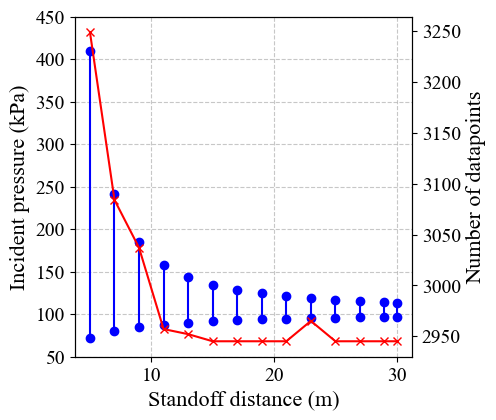

In [9]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Filter the DataFrame to include only rows with Standoff distance >= 3
filtered_df = results_df_b[results_df_b['standoff distance'] >= 5]

# Set global font to Times New Roman
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['font.size'] = 16

fig, ax1 = plt.subplots(figsize=(5, 5))

# Plot max and min pressure values with standoff distance
for _, row in filtered_df .iterrows():
    ax1.plot([row['standoff distance'], row['standoff distance']],
             [row['min_pressure'], row['max_pressure']],
             color='blue', marker='o', label='Pressure Range' if _ == filtered_df.index[0] else "")

# Label the primary y-axis (for pressure values)
ax1.set_xlabel('Standoff distance (m)')
ax1.set_ylabel('Incident pressure (kPa)')
ax1.tick_params(axis='both', labelsize=14)
#ax1.set_xticks([1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3])
ax1.set_ylim(50,450)

# Create a secondary y-axis for the number of data points
ax2 = ax1.twinx()
ax2.plot(filtered_df['standoff distance'], filtered_df['datapoints'],
         color='red', marker='x', label='Number of datapoints')
ax2.set_ylabel('Number of datapoints')
ax2.tick_params(axis='y', labelsize=14)
#ax2.set_xticks([1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3])
#ax1.set_xlim(2.8,31)

# Add grid lines
ax1.grid(True, linestyle='--', alpha=0.7)

# Combine legend handles and labels from both axes
handles, labels = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
handles += handles2
labels += labels2

# Add legend outside the plot with two columns
#fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, 0), ncol=2, fontsize=16, frameon=False)

# Title and layout adjustments
# plt.title('Pressure Range and Number of Datapoints vs. Standoff Distance')
fig.subplots_adjust(bottom=0.2, right = 0.8)

# Save the plot as an image
plt.savefig('IP_farfield_info_plot3.png', dpi=200, facecolor='white', bbox_inches='tight')